<a href="https://colab.research.google.com/github/chilaact/predict_aquatic_toxity/blob/master/predict_aquatic_toxity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QSAR Aquatic Toxicity Prediction with Simple Neural Networks Using TensorFlow

Mount drive

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Preparation**

Import libraries

In [0]:
from pandas import read_csv
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

## Load data

dataset from https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity

In [72]:
data = read_csv("/content/drive/My Drive/Colab Notebooks/task/qsar_aquatic_toxicity.csv", sep=";")
data

,0,0.1,0.2,2.419,1.225,0.667,0.3,0.4,3.740
0,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
1,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
2,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
3,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
4,215.34,327.629,3,0.189,4.677,1.333,0,4,6.064
...,...,...,...,...,...,...,...,...,...
540,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
541,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
542,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
543,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


In [73]:
#Looks like the data dont have header, reload it with header
data = read_csv("/content/drive/My Drive/Colab Notebooks/task/qsar_aquatic_toxicity.csv", sep=";", 
                   names=['TPSA', 'SAacc', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040',
                          'quantitative response']) #from UCI web
data

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


**Data information and characteristics**

In [74]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TPSA                   546 non-null    float64
 1   SAacc                  546 non-null    float64
 2   H-050                  546 non-null    int64  
 3   MLOGP                  546 non-null    float64
 4   RDCHI                  546 non-null    float64
 5   GATS1p                 546 non-null    float64
 6   nN                     546 non-null    int64  
 7   C-040                  546 non-null    int64  
 8   quantitative response  546 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


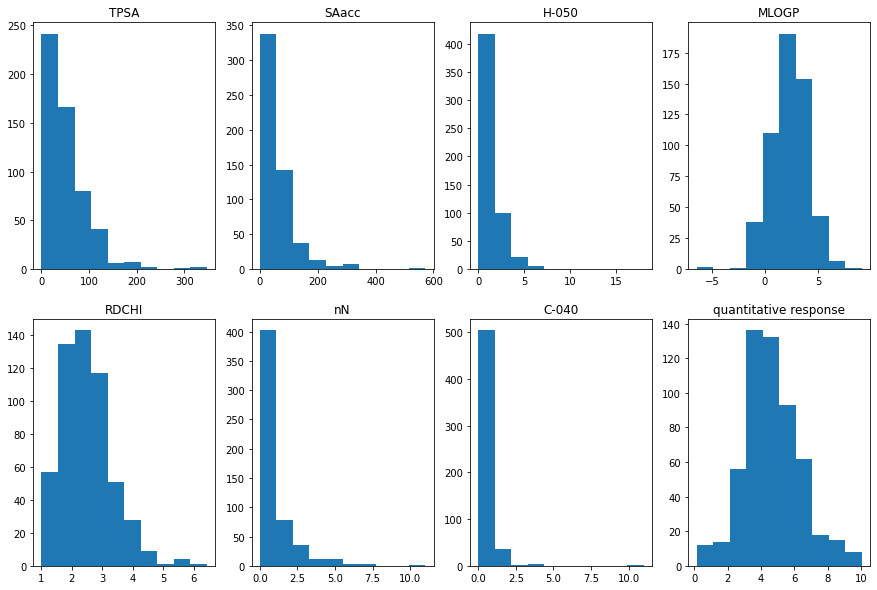

In [75]:
#Histogram Visualization
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
axs[0, 0].hist(data['TPSA'])
axs[0, 0].set_title('TPSA')

axs[0, 1].hist(data['SAacc'])
axs[0, 1].set_title('SAacc')

axs[0, 2].hist(data['H-050'])
axs[0, 2].set_title('H-050')

axs[0, 3].hist(data['MLOGP'])
axs[0, 3].set_title('MLOGP')

axs[1, 0].hist(data['RDCHI'])
axs[1, 0].set_title('RDCHI')

axs[1, 1].hist(data['nN'])
axs[1, 1].set_title('nN')

axs[1, 2].hist(data['C-040'])
axs[1, 2].set_title('C-040')

axs[1, 3].hist(data['quantitative response'])
axs[1, 3].set_title('quantitative response')

plt.show()

Define a function to get the columns that don’t have any missing values

In [0]:
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

Get the columns that do not have any missing values

In [0]:
num_cols = get_cols_with_no_nans(data, 'num')
cat_cols = get_cols_with_no_nans(data, 'no_num')

How many column we got

In [78]:
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 9
Number of nun-numerical columns with no nan values : 0


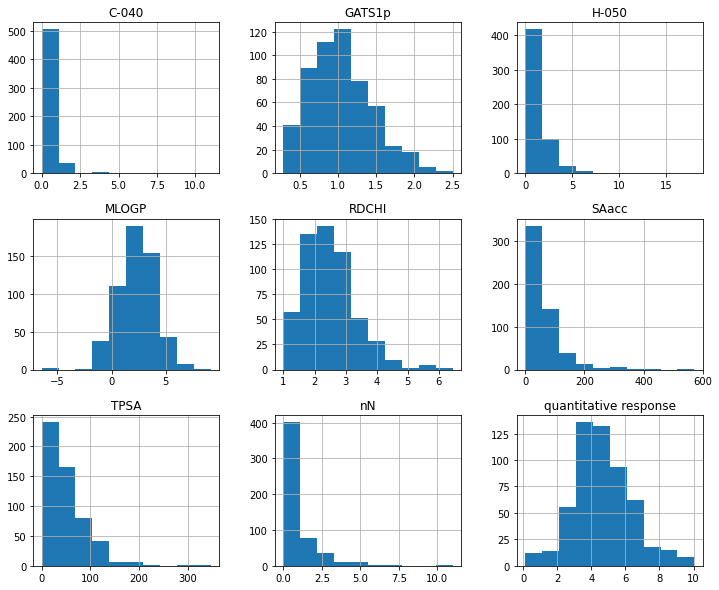

In [79]:
data = data[num_cols + cat_cols]
data.hist(figsize = (12,10))
plt.show()

## Split data

70% of data for data training and 30% of data for data testing

In [80]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(axis=0, columns='quantitative response'),
                                                   data['quantitative response'],
                                                   test_size=0.3)
print("Train: ", len(x_train))
print("Test: ", len(x_test))

Train:  382
Test:  164


## Train and test the models

In [81]:
lnr = LinearRegression()
mlp = MLPRegressor()

lnr.fit(x_train, y_train)
mlp.fit(x_train, y_train)

hasil_lnr = lnr.predict(x_test)
hasil_mlp = mlp.predict(x_test)

print("Mead Squared Error Linear Regression : " ,mean_squared_error(y_test, hasil_lnr))
print("Mead Squared Error Multilayer Perceptron : " ,mean_squared_error(y_test, hasil_mlp))

Mead Squared Error Linear Regression :  1.2153673610613205
Mead Squared Error Multilayer Perceptron :  1.3606010584612191


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


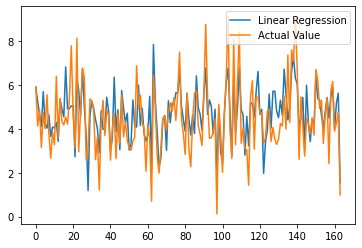

In [82]:
plt.plot(list(hasil_lnr), label='Linear Regression')
plt.plot(list(y_test), label='Actual Value')

plt.legend(loc="upper right")

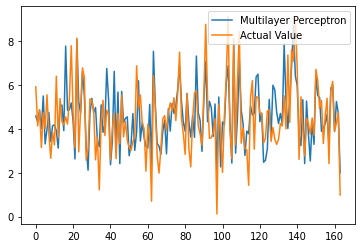

In [83]:
plt.plot(list(hasil_mlp), label='Multilayer Perceptron')
plt.plot(list(y_test), label='Actual Value')

plt.legend(loc="upper right")

<h2>TENSORFLOW PART</h2>

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import Sequential, layers, optimizers

## Modeling

Consists of :
8 nodes in the input layer
8 nodes in hidden layers 1 and 2 along with the activation function used is ReLU also 1 node in the output because this case is regression

In [0]:
def Simple_NN():
  model = Sequential([
    layers.Dense(8, activation='relu', input_shape=[8]),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [86]:
model = Simple_NN()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


## Training model

In [87]:
model.fit(x_train, y_train, epochs=100, validation_split = 0.2, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 18ms/step - loss: 61.6781 - mae: 5.2223 - mse: 63.2926 - val_loss: 23.8351 - val_mae: 4.3222 - val_mse: 25.5011
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 23.1615 - mae: 3.9148 - mse: 23.4601 - val_loss: 23.7939 - val_mae: 4.3175 - val_mse: 25.8743
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 21.2271 - mae: 3.7610 - mse: 21.3394 - val_loss: 23.2258 - val_mae: 4.2041 - val_mse: 25.5512
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 19.6617 - mae: 3.6164 - mse: 19.8852 - val_loss: 20.9824 - val_mae: 3.9444 - val_mse: 23.3020
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 18.2128 - mae: 3.4714 - mse: 18.3308 - val_loss: 22.7280 - val_mae: 4.1517 - val_mse: 25.2934
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 17.4010 - mae: 3.3389 - mse: 17.4315 - val_loss: 19.0161 - val_mae: 3.7165 - val_mse: 21.34

## Testing model to predict the <b>x_test</b>

In [88]:
hasil_tf = model.predict(x_test)

# HASIL PREDIKSI
hasil_tf.ravel()

array([5.135836 , 5.2878137, 4.6512876, 4.2004113, 5.4670815, 4.179812 ,
       4.2026277, 4.4868703, 3.4341762, 3.8441684, 3.7709377, 4.0886464,
       2.503535 , 5.0856276, 4.836491 , 4.1153665, 6.9667153, 5.2581887,
       4.599852 , 4.482638 , 2.964024 , 2.7234886, 6.1184945, 5.537432 ,
       4.4652786, 6.1967072, 5.076163 , 3.3046548, 1.2897516, 4.4652786,
       5.3718667, 4.8112416, 4.812182 , 3.6178834, 2.768813 , 5.0754685,
       3.9444072, 5.155165 , 6.3387074, 5.291369 , 2.4788043, 3.687373 ,
       7.7038407, 3.460032 , 4.4368234, 3.0083683, 5.1391063, 4.5830216,
       4.059736 , 4.4000077, 2.7427814, 3.069907 , 6.091952 , 3.5065792,
       4.267016 , 6.4277825, 4.6523232, 4.5951905, 3.782582 , 3.4382885,
       3.185725 , 5.143988 , 2.1938827, 7.800238 , 5.146125 , 4.1303806,
       2.9880855, 2.9151294, 3.8383873, 4.2181993, 3.0108278, 4.9471574,
       4.082581 , 4.927897 , 4.649853 , 3.5298336, 5.022555 , 6.483727 ,
       5.957232 , 4.2354507, 3.40536  , 5.5532665, 

## Evaluate the model using <b>mean squared error</b>

Getting smaller the MSE of a model, getting better model in predicting

In [89]:
mean_squared_error(y_test, hasil_tf)

1.4488213228194111

## Data result visualization with line chart

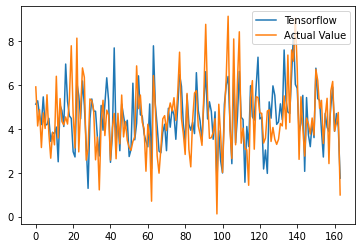

In [90]:
plt.plot(list(hasil_tf), label='Tensorflow')
plt.plot(list(y_test), label='Actual Value')

plt.legend(loc="upper right")